In [6]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [7]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

In [8]:
HTML('''<script>
queue_show=true;
function queue_toggle() {
 if (queue_show){
 $('div.queue').hide();
 } else {
 $('div.queue').show();
 }
queue_show = !queue_show
} 
$( document ).ready(queue_toggle);
</script>
<form action="javascript:queue_toggle()"><input type="submit" value="Click here to toggle on/off the queues."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

<div class="queue">
    Lecture 5 - 00:00
</div>

## 3.1 Law of large numbers and central limit theorem

### 3.1.1 The law of large numbers

The law of large numbers essentially says that the sample mean tends to the population mean when the sample size tends to infinity:

\begin{equation}
  \langle X_N \rangle = \frac{1}{N} \sum_{i=1}^{N} X_i \to \mu \quad {\rm for} \quad N \to \infty
\end{equation}

### 3.1.2 The central limit theorem

The central limit theorem (CLT) implies that:

\begin{equation}
    \lim_{N \to \infty} \sum_{i=1}^N X_i \xrightarrow{d} \mathcal{N}(\mu_N,s_N^2) \quad ,
\end{equation}

with

\begin{equation}
    \mu_N = \sum_{i=1}^N \mu_i \quad ,
\end{equation}

and

\begin{equation}
    s_N^2 = \sum_{i=1}^N \sigma_i^2 \quad .
\end{equation}

The sum of a large number of random variates should distribute as a normal distribution with a mean equal to the sum of the means from which the random variates are drawn, and a variance equal to the sum of the variances from which the random variates are drawn.

When $\mu_i = \mu$ and $\sigma_i^2 = \sigma^2$), we have

\begin{equation}
    \lim_{N \to \infty} \sum_{i=1}^N X_i \xrightarrow{d} \mathcal{N}(N\mu,N\sigma^2) \quad .
\end{equation}

<div class="queue">
    Lecture 5 - 00:10
</div>

### Case study: Wizard trick

Is it possible to turn random numbers drawn from a uniform distribution into a normal distribution?

<span style="text-decoration: underline">Case 1:</span> Imagine you draw 10,000 numbers from a uniform distribution in the range $[0,1[$.

<span style="text-decoration: underline">Case 2:</span> Imagine you draw another 10,000 uniform numbers just like above and add pairs together.

<span style="text-decoration: underline">Case 3:</span> Imagine you draw another 10,000 uniform numbers and add them to the previous pairs.

<span style="text-decoration: underline">Case 4:</span> Imagine you draw another 7 sets of 10,000 uniform numbers just like above and add them to the tripplets in order to have the sum of 10 uniform numbers.

What does the distribution of each case look like?

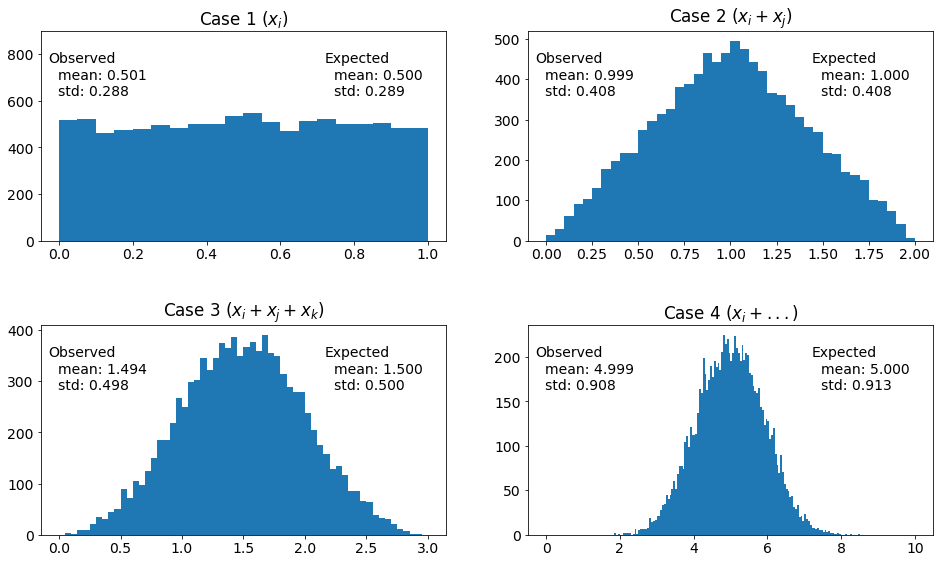

In [3]:
## We generate sets of random numbers drawn from a uniform distribution in the range [0,1[.
uniform_sets = np.random.uniform(size=(10,10000))

mu1 = uniform_sets[0].mean()
mu2 = uniform_sets[:2].sum(0).mean()
mu3 = uniform_sets[:3].sum(0).mean()
mu10 = uniform_sets.sum(0).mean()
std1 = uniform_sets[0].std()
std2 = uniform_sets[:2].sum(0).std()
std3 = uniform_sets[:3].sum(0).std()
std10 = uniform_sets.sum(0).std()

fig,ax = plt.subplots(2, 2, figsize=[16,10])
_ = ax[0,0].hist(uniform_sets[0], bins=20, range=[0,1])
_ = ax[0,1].hist(uniform_sets[:2].sum(0), bins=40, range=[0,2])
_ = ax[1,0].hist(uniform_sets[:3].sum(0), bins=60, range=[0,3])
_ = ax[1,1].hist(uniform_sets.sum(0), bins=200, range=[0,10])
_ = ax[0,0].set_title('Case 1 ($x_i$)'.format(mu1, std1))
_ = ax[0,1].set_title('Case 2 ($x_i + x_j$)'.format(mu2, std2))
_ = ax[1,0].set_title('Case 3 ($x_i + x_j + x_k$)'.format(mu3, std3))
_ = ax[1,1].set_title('Case 4 ($x_i + ...$)'.format(mu10, std10))
_ = ax[0,0].text(0.02, 0.9, 'Observed\n  mean: {:.3f}\n  std: {:.3f}'.format(mu1 , std1 ), transform=ax[0,0].transAxes, size=14, verticalalignment='top')
_ = ax[0,1].text(0.02, 0.9, 'Observed\n  mean: {:.3f}\n  std: {:.3f}'.format(mu2 , std2 ), transform=ax[0,1].transAxes, size=14, verticalalignment='top')
_ = ax[1,0].text(0.02, 0.9, 'Observed\n  mean: {:.3f}\n  std: {:.3f}'.format(mu3 , std3 ), transform=ax[1,0].transAxes, size=14, verticalalignment='top')
_ = ax[1,1].text(0.02, 0.9, 'Observed\n  mean: {:.3f}\n  std: {:.3f}'.format(mu10, std10), transform=ax[1,1].transAxes, size=14, verticalalignment='top')
_ = ax[0,0].text(0.7, 0.9, 'Expected\n  mean: {:.3f}\n  std: {:.3f}'.format(0.5 , 1/np.sqrt(12)), transform=ax[0,0].transAxes, size=14, verticalalignment='top')
_ = ax[0,1].text(0.7, 0.9, 'Expected\n  mean: {:.3f}\n  std: {:.3f}'.format(1.0 , np.sqrt(2/12)), transform=ax[0,1].transAxes, size=14, verticalalignment='top')
_ = ax[1,0].text(0.7, 0.9, 'Expected\n  mean: {:.3f}\n  std: {:.3f}'.format(1.5 , np.sqrt(3/12)), transform=ax[1,0].transAxes, size=14, verticalalignment='top')
_ = ax[1,1].text(0.7, 0.9, 'Expected\n  mean: {:.3f}\n  std: {:.3f}'.format(5.0 , np.sqrt(10/12)), transform=ax[1,1].transAxes, size=14, verticalalignment='top')
_ = ax[0,0].set_ylim(0,900)
_ = fig.subplots_adjust(0.125, 0.2, 0.9, 0.9, 0.2, 0.4)


<span style="text-decoration: underline">Lesson 1:</span>
> As expected, the Case 1 scenario is just a flat distribution with mean $0.5$ and variance equal to $1/12$ (_can you calculate them?_). For the other cases, according to the CLT, the predicted mean should be $N\mu = N/2$ and the variance $N\sigma = N/12$. The experiment agrees remarkably well with the prediction.

<span style="text-decoration: underline">Lesson 2:</span>
> The other important prediction of CLT is that the distribution will increasingly resemble a Gaussian as the number of summed random variables increases. This is clearly the case as we go from a uniform distribution in Case 1, to a triangular distribution in Case 2, to something more rounded in Case 3, to a very Gaussian looking one in Case 4. _As a side note, each distribution can be computed exactly: they are the convolution of $N$ top-hat functions. Something to remember when you do convolutions..._

<span style="text-decoration: underline">Lesson 3:</span>
> The mean and standard deviations only depend on the number of random variables that are summed. However, how close the observed values agree with the expected values relies on another principle... the law of large numbers.

**It is almost magical... we have have turned flat numbers into a normal distribution.**

<div class="queue">
    Lecture 5 - 00:30
</div>

## 3.2 Parameter estimation

#### Expectation values

Expectation of a function $a(x)$ (or value) under normalised PDF $\mathcal{L}(x)$. In the continuous case:

\begin{equation}
  E\left[ f(x) \right] = \int_\Omega a(x) \mathcal{L}(x) {\rm d}x \,.
\end{equation}

Discrete case:

\begin{equation}
  E\left[ f(x) \right] = \sum_i^N a(x_N) \mathcal{L}(x_N) \,.
\end{equation}

_Note: $\langle a \rangle = E \left[a\right]$._

#### Common formulas involving expectation values

Here are some basic properties involving the expectation value and variance. We define $X$ and $Y$ as _independent and uncorrelated_ variates, $\alpha$ as a constant, and recalling $V(X)$ the variance of $X$:

- $E\left[\alpha+X\right] = \alpha + E\left[X\right]$
- $E\left[\alpha X\right] = \alpha E\left[X\right]$
- $E\left[X+Y\right] = E\left[X\right] + E\left[Y\right]$
- $E\left[XY\right] = E\left[X\right] E\left[Y\right]$


- $V(X) = E\left[\left(X - E\left[X\right]\right)^2\right] = E\left[X^2\right] - E\left[X\right]^2$
- $V(\alpha + X) = V(X)$
- $V(\alpha X) = \alpha^2 V(X)$
- $V(X+Y) = V(X-Y) = V(X)+V(Y)$
- $V(XY) = E\left[X^2\right] E\left[Y^2\right] - E\left[X\right]^2 E\left[Y\right]^2$

<div class="queue">
    Lecture 5 - 00:40
</div>

### 3.2.1 Definition

**Estimator**: procedure that is applied to random variates and gives a numeric value for a parameter and/or a property of the parent population/distribution from which these variates are sampled. _[Barlow, Chapter 5]_

<div class="example">Example 1</div>

Suppose you want to find the average height of Physics and Astronomy students at Manchester. Here are 8 possibles options:

1. Add up all the heights and divide by N.
2. Add up a set of 10 heights and divide by 10.
3. Add all the heights and divide by N - 1.
4. Throw away the data and give the answer as 180 cm.
5. Multiply all the heights and take the Nth root (i.e. geometric mean).
6. Choose the most common height (i.e. the mode).
7. Add the tallest and shortest heights, and divide by 2.
8. Add up the second, fourth, sixth, etc., heights and divide by N/2 for N even, and (N-1)/2 for N odd.

### 3.2.2 Properties

A 'good' estimator fulfills the following criteria:

1. Consistent
2. Unbiased
3. Efficient

<div class="queue">
    Lecture 6 - 00:00
</div>

#### Consistent

Tends to the true value as $N \to \infty$:

\begin{equation}
  \lim_{N \to \infty} \widehat{a} = a \,.
\end{equation}

Typical test is for error of estimator (i.e. variance) to tend to zero as $N \to \infty$:

\begin{equation}
  \lim_{N \to \infty} V(\widehat{a}) = 0 \,.
\end{equation}

<div class="example">Example 1</div>

Option 1 is consistent:

\begin{equation}
  \widehat{\mu} = \frac{X_1 + X_2 + X_3 + \dots + X_N}{N} = \langle X \rangle \,,
\end{equation}

since for $N \to \infty$ the law of large unmbers ensures that $\langle X \rangle \to \mu$.

Alternatively

\begin{eqnarray}
    V(\hat{\mu}) &=& V\left(\frac{X_1 + X_2 + X_3 + \dots + X_N}{N}\right) \\
                 &=& \frac{1}{N^2} \left( V(X_1) + V(X_2) + V(X_3) + \dots + V(X_N) \right) \\
                 &=& \frac{1}{N^2} N V(X) \\
                 &=& \frac{V(X)}{N} \\
\end{eqnarray}

We can see that $\lim_{N \to \infty} V(\widehat{a}) = 0$.

#### Unbiased

Expectation value is equal to the true value:

\begin{equation}
  E\left[ \widehat{a} \right] = a \,.
\end{equation}

<div class="example">Example 1</div>

From the previous example, we can show that Option 1 is unbiased:

\begin{eqnarray}
  E \left[ \widehat{\mu} \right] &=& E\left[ \frac{X_1 + X_2 + X_3 + \dots + X_N}{N} \right] \\
                               &=& \frac{E\left[X_1\right] + E\left[X_2\right] + E\left[X_3\right] + \dots + E\left[X_N\right]}{N} \\
                               &=& \frac{N E\left[X\right]}{N} \\
                               &=& \mu \,.
\end{eqnarray}

#### Efficient

Better of two estimators is the one with smallest variance.

<div class="example">Example 1</div>

Option 1 is efficent using the variance:

\begin{equation}
  V(\widehat{\mu}) = \frac{\sigma^2}{N} \,.
\end{equation}

This follows from CLT. Here $\sigma$ is variance of a single measurement and $V(\widehat{\mu})$ is variance of the mean. Known as the standard deviation of the mean.

<div class="queue">
    Lecture 6 - 00:20
</div>

### 3.2.3 Some basic estimators

<div class="example">Example 1: Variance with known mean</div>

True mean $\mu$ is known:
\begin{equation}
  \widehat{V(X)} \equiv \widehat{\sigma^2} = \frac{1}{N} \sum (X_i - \mu)^2 \,.
\end{equation}

**Unbiased**:

\begin{eqnarray}
  E\left[ \widehat{\sigma^2} \right] &=& E\left[ \frac{1}{N} \sum (X_i - \mu)^2 \right] \\
                                     &=& \frac{1}{N} \sum E\left[ \left(X_i - \mu \right)^2 \right] \\
                                     &=& \frac{1}{N} \sum V(X_i) \quad \textrm{by the definition of variance} \\
                                     &=& \frac{1}{N} N \sigma^2 = \sigma^2 \,.
\end{eqnarray}

**Consistent**:

\begin{eqnarray}
  V(\widehat{\sigma^2}) &=& V \left( \frac{1}{N} \sum (X_i - \mu)^2 \right) \\
                        &=& \frac{1}{N^2} V \left( \sum (X_i - \mu)^2 \right) \\
                        &=& \frac{1}{N^2} \sum V (X_i - \mu)^2 \\
                        &=& \frac{1}{N^2} \left( \sum E\left[ (X_i - \mu)^4 \right] - \sum E\left[ (X_i - \mu)^2 \right]^2 \right) \\
                        &=& \frac{1}{N^2} \left( \sum 3\sigma^4 - \sum (\sigma^2)^2 \right) \quad \textrm{see note below} \\
                        &=& \frac{1}{N^2} \sum 2 \sigma^4 \\
                        &=& \frac{1}{N^2} 2N\sigma^4 \\
                        &=& \frac{2\sigma^4}{N}
\end{eqnarray}

In the limit of $N \to \infty$, this equation will clearly go to zero.

*Note: assumed normally distributed, and use kurtosis identity:*
\begin{eqnarray}
    \kappa &=& \frac{E\left[ (X_i - \mu)^4 \right]}{\sigma^4} - 3 \\
           &=& 0 \quad \textrm{for a Gaussian} \\
   &\therefore{}& E\left[ (X_i - \mu)^4 \right] = 3\sigma^4
\end{eqnarray}

<div class="queue">
    Lecture 6 - 00:35
</div>

<div class="example">Example 2: Variance with unknown mean</div>

True mean $\mu$ unknown, use sample mean $\langle X \rangle$:

\begin{equation}
  \widehat{V(x)} \equiv \widehat{s^2_{\rm uncorr}} = \frac{1}{N} \sum \left(X_i - \langle X \rangle\right)^2 \,.
\end{equation}

**Biased**:

\begin{eqnarray}
  E\left[ \widehat{s^2_{\rm uncorr}} \right] &=& \frac{1}{N} E\left[ \sum (X_i - \langle X \rangle )^2 \right] \\
                                 &=& \frac{1}{N} \sum E\left[ X_i^2 - \langle X \rangle^2 \right] \\
                                 &=& \frac{N}{N} E\left[ (X_i^2 - \mu^2) - (\langle X \rangle^2 - \mu^2) \right] \\
                                 &=& V(X) - V(\langle X \rangle) \\
                                 &=& V(X) - V(X)/N \\
                                 &=& \frac{N-1}{N} V(X) \neq V(X)
\end{eqnarray}

*Note: used CLT for $V(\langle X \rangle) = V(X)/N$.*

Could make it unbiased using correction factor:

\begin{equation}
  \widehat{V(X)} = s^2 = \frac{1}{N-1} \sum (X_i - \langle X \rangle)^2 \,.
\end{equation}

Correction known as **Bessel's correction**.

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>